<a href="https://colab.research.google.com/github/diegomarlop/LAB_IRONHACK/blob/main/Lab4_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab | Comparing regression models
So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [3]:
def clean_headers(x):
  x.columns =[i.lower().replace(' ','_') for i in x.columns]
  #x['effective_to_date']= pd.to_datetime(x['effective_to_date'],errors='coerce')
  return x

In [4]:
data = clean_headers(data)

In [5]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
corr_matrix = data.corr()

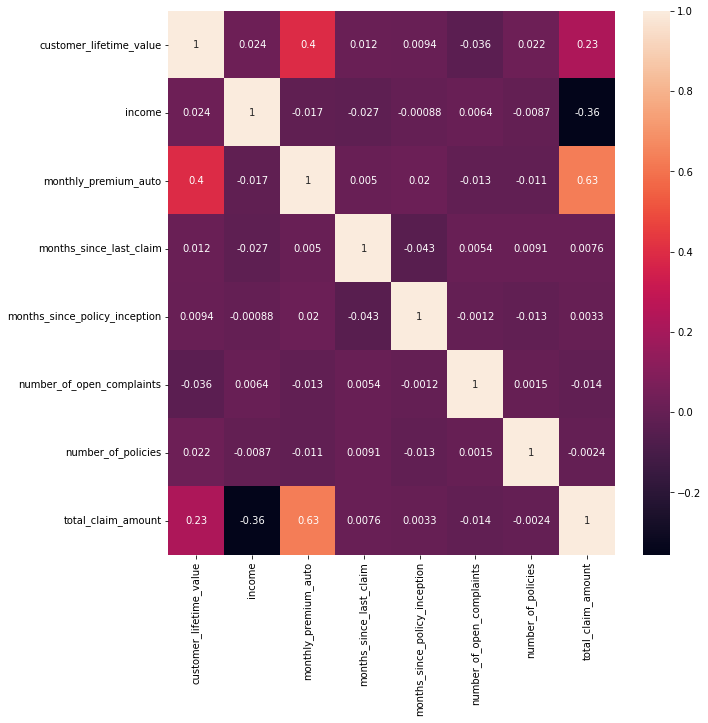

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(corr_matrix,annot=True)

In [6]:
data = data.drop('customer',axis=1)

In [7]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)

<ipython-input-7-de9b85801f8d>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


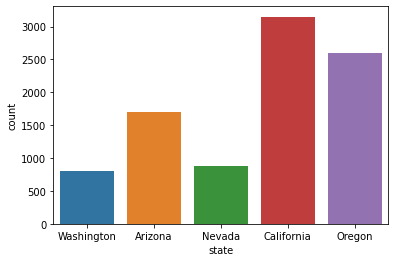

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


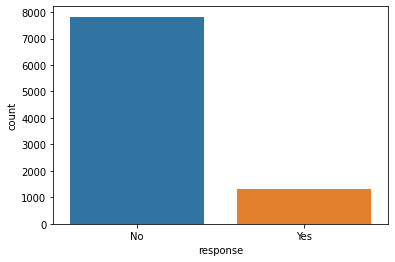

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


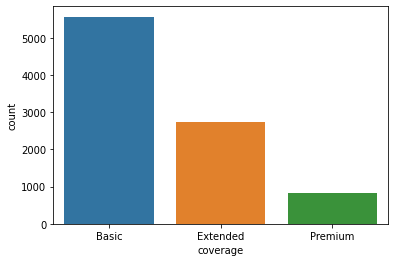

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


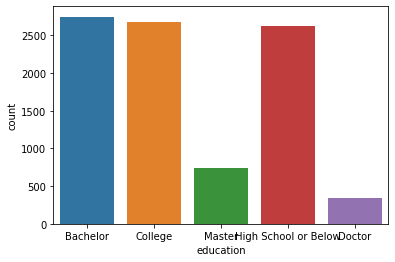

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


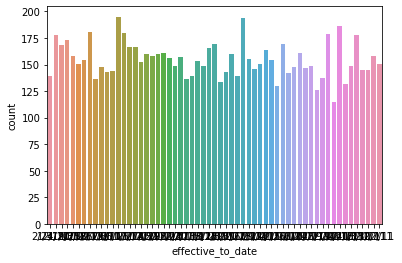

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


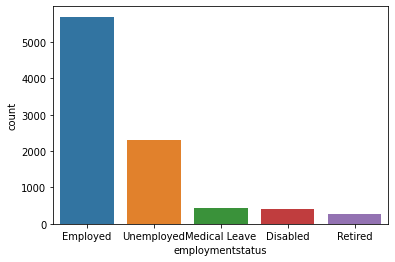

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


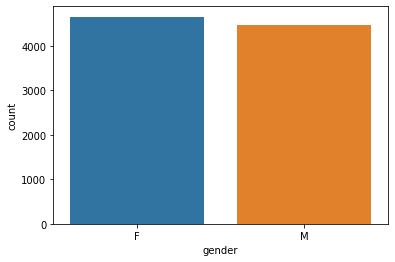

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


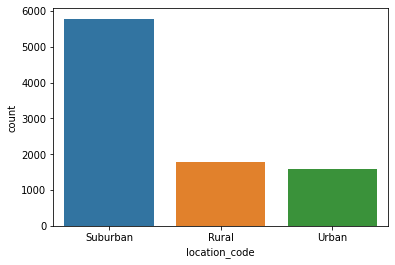

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


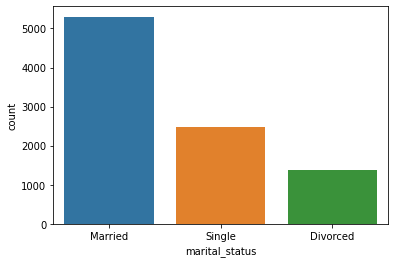

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


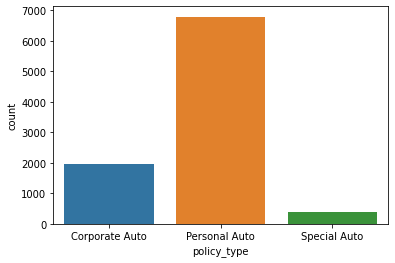

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


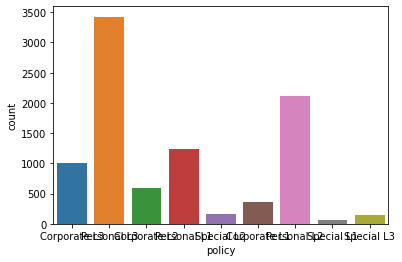

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


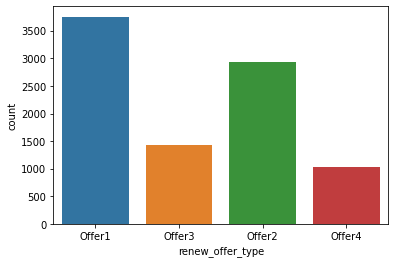

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


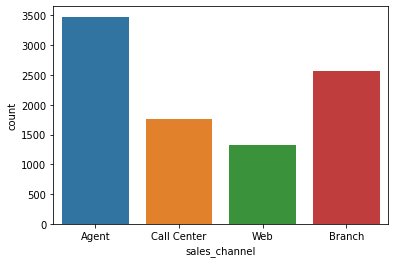

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


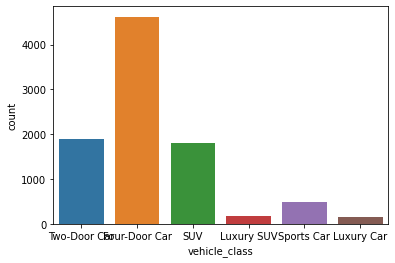

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


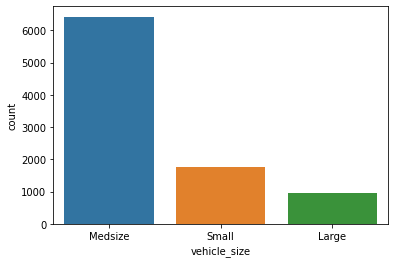

In [8]:
for i in categoricals:
  sns.countplot(categoricals[i])
  plt.show()

In [9]:
vals=pd.DataFrame(categoricals['education'].value_counts()).reset_index()
vals.columns=['education','counts']
vals

,education,counts
0,Bachelor,2748
1,College,2681
2,High School or Below,2622
3,Master,741
4,Doctor,342


In [10]:
emp_edu =vals[vals['counts']>800]
emp_edu =list(emp_edu['education'])

In [11]:
def clean_edu(x):
  if x in emp_edu:
    return x
  else:
    return 'other'

In [12]:
categoricals['education']= list(map(clean_edu,categoricals['education']))
categoricals['education'].value_counts()

<ipython-input-12-63672bd53e12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['education']= list(map(clean_edu,categoricals['education']))


Bachelor                2748
College                 2681
High School or Below    2622
other                   1083
Name: education, dtype: int64

In [13]:
vals1=pd.DataFrame(categoricals['employmentstatus'].value_counts()).reset_index()
vals1.columns=['employmentstatus','counts']
vals1

,employmentstatus,counts
0,Employed,5698
1,Unemployed,2317
2,Medical Leave,432
3,Disabled,405
4,Retired,282


In [14]:
emp_emstat =vals1[vals1['counts']>500]
emp_emstat =list(emp_emstat['employmentstatus'])

In [15]:
def clean_emstat(x):
  if x in emp_emstat:
    return x
  else:
    return 'other'

In [16]:
categoricals['employmentstatus']= list(map(clean_emstat,categoricals['employmentstatus']))
categoricals['employmentstatus'].value_counts()

<ipython-input-16-a179e8883a35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['employmentstatus']= list(map(clean_emstat,categoricals['employmentstatus']))


Employed      5698
Unemployed    2317
other         1119
Name: employmentstatus, dtype: int64

In [17]:
vals2=pd.DataFrame(categoricals['vehicle_class'].value_counts()).reset_index()
vals2.columns=['vehicle_class','counts']
vals2

,vehicle_class,counts
0,Four-Door Car,4621
1,Two-Door Car,1886
2,SUV,1796
3,Sports Car,484
4,Luxury SUV,184
5,Luxury Car,163


In [18]:
emp_vc =vals2[vals2['counts']>200]
emp_vc =list(emp_vc['vehicle_class'])

In [19]:
def clean_vc(x):
  if x in emp_vc:
    return x
  else:
    return 'Luxury'

In [20]:
categoricals['vehicle_class']= list(map(clean_vc,categoricals['vehicle_class']))
categoricals['vehicle_class'].value_counts()

<ipython-input-20-c179ee3e5bab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['vehicle_class']= list(map(clean_vc,categoricals['vehicle_class']))


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury            347
Name: vehicle_class, dtype: int64

In [21]:
numericals['number_of_open_complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [22]:
def clean_noc(x):
  if x in [1,2,3,4,5]:
    return 1
  else:
    return x

In [23]:
numericals['number_of_open_complaints']=list(map(clean_noc,numericals['number_of_open_complaints']))

<ipython-input-23-76eb6a18975b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals['number_of_open_complaints']=list(map(clean_noc,numericals['number_of_open_complaints']))


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


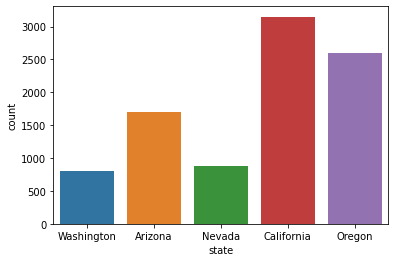

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


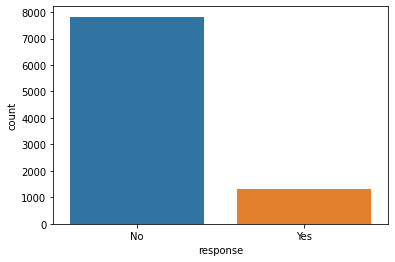

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


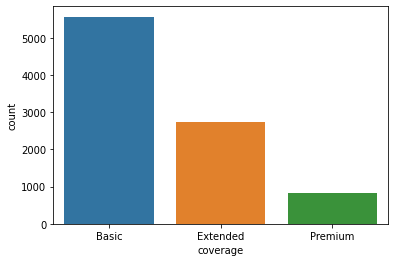

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


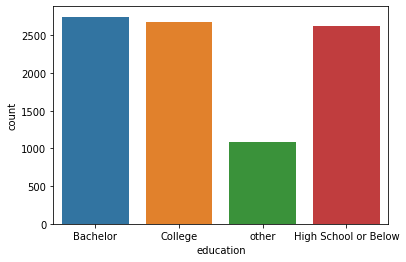

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


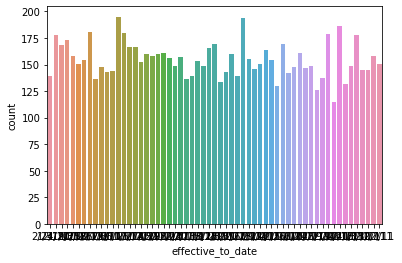

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


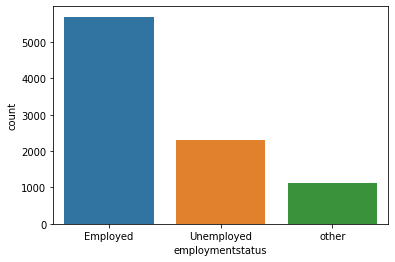

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


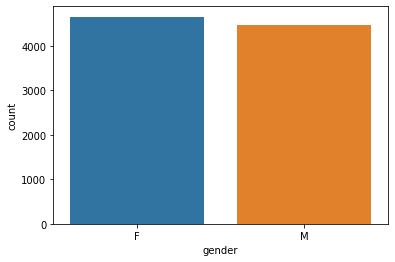

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


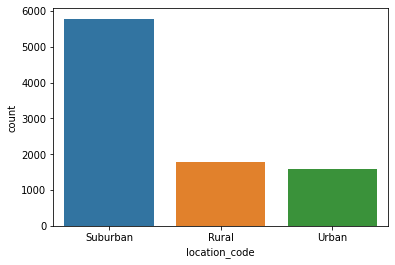

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


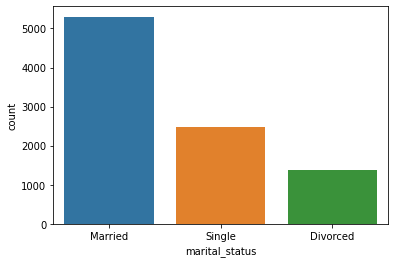

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


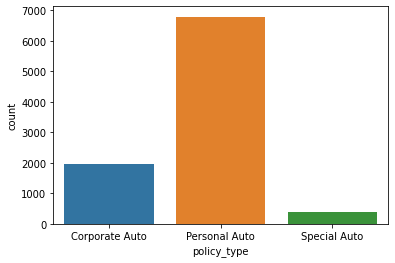

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


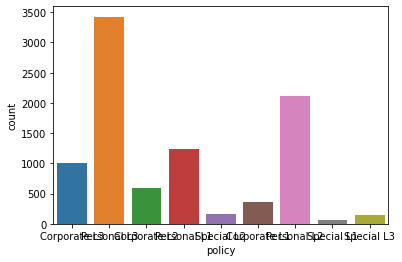

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


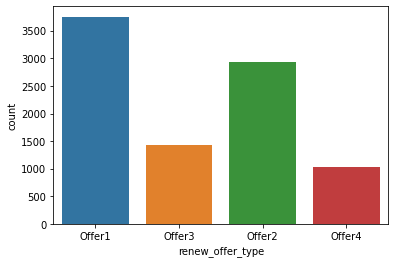

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


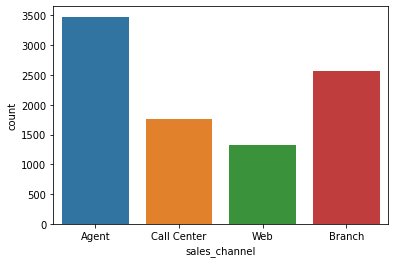

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


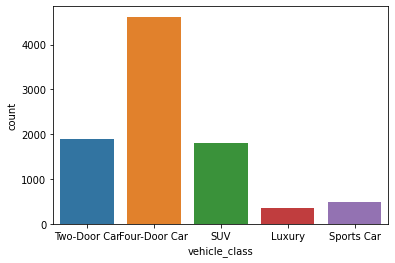

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


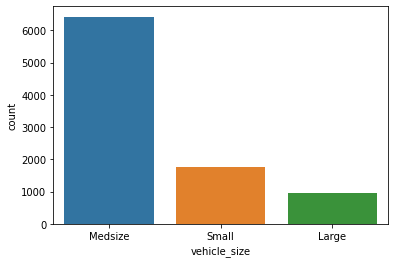

In [24]:
for i in categoricals:
  sns.countplot(categoricals[i])
  plt.show()

In [ ]:
for i in categoricals:
  plt.figure(figsize=(10,10))
  sns.barplot(data=categoricals,x=i,y=data['total_claim_amount'])
  plt.show()

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(data=categoricals,x=data['total_claim_amount'],y='effective_to_date')

In [ ]:
#We will start with removing outliers. 
#So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that.
#Use the function to remove the outliers and apply it to the dataframe.

In [ ]:
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,1,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [ ]:
for i in numericals:
  sns.distplot(numericals[i])
  plt.show()

In [ ]:
iqr=np.percentile(numericals['customer_lifetime_value'],75)-np.percentile(numericals['customer_lifetime_value'],25)
upper_limit=np.percentile(numericals['customer_lifetime_value'],75)+1.5*iqr
print(upper_limit)


16414.039911750002


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


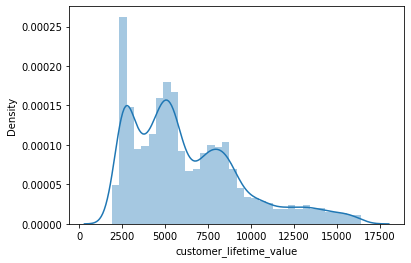

In [ ]:
numericals=numericals[numericals['customer_lifetime_value']<upper_limit]
sns.distplot(numericals['customer_lifetime_value'])
plt.show()

In [ ]:
#Create a copy of the dataframe for the data wrangling.

In [25]:
#Normalize the continuous variables. You can use any one method you want.
from sklearn.preprocessing import StandardScaler
transfromer=StandardScaler().fit(numericals[['customer_lifetime_value']])
x_stan=transfromer.transform(numericals[['customer_lifetime_value']])

In [ ]:
x_stan

array([[-1.08500227],
       [ 0.21614443],
       [ 2.03943873],
       ...,
       [ 0.58165983],
       [ 0.38431344],
       [-1.13181448]])

In [26]:
transfromer=StandardScaler().fit(numericals[['income']])
x_stani=transfromer.transform(numericals[['income']])
x_stani

array([[ 0.61282744],
       [-1.23961684],
       [ 0.36570978],
       ...,
       [-1.23961684],
       [-0.51735647],
       [-1.23961684]])

In [ ]:
#Encode the categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first').fit(categoricals)
encoder=encoder.transform(categoricals).toarray()
encoder

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [ ]:
#The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be us
categoricals['effective_to_date']=categoricals['effective_to_date'].replace('/',' ',regex=True)

<ipython-input-210-d5e31af8559f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['effective_to_date']=categoricals['effective_to_date'].replace('/',' ',regex=True)


In [ ]:
categoricals['effective_to_date']

0       2 24 11
1       1 31 11
2       2 19 11
3       1 20 11
4        2 3 11
         ...   
9129    2 10 11
9130    2 12 11
9131     2 6 11
9132     2 3 11
9133    2 14 11
Name: effective_to_date, Length: 9134, dtype: object

In [ ]:
import re

def month(x):
  x=str(x)
  if len(x)<4:
    return np.nan
  else: 
    pattern='\d'
    mt=re.findall(pattern,x)[0]
    return int(mt)

In [ ]:
#the first 10 months
months= list(map(month,categoricals['effective_to_date']))
months[:10] #we can make a column with the name month  in numericals

[2, 1, 2, 1, 2, 1, 2, 1, 1, 2]

In [ ]:
def dayweek(x):
  x=str(x)
  if len(x)<4:
    return np.nan
  else: 
    pattern='\s\d+'
    dw=re.findall(pattern,x)[0]
    return int(dw)

In [ ]:
day_week = list(map(dayweek,categoricals['effective_to_date']))
day_week[:10] #we can make a column with the dayweek in numericals

[24, 31, 19, 20, 3, 25, 24, 18, 26, 17]

In [ ]:
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [27]:
categoricals = categoricals.drop('effective_to_date',axis=1)

In [28]:
#Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first').fit(categoricals)
encoder=encoder.transform(categoricals).toarray()
encoder

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

###Lab | Comparing regression models

In [33]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [30]:
y = numericals['total_claim_amount']
X_num = numericals.drop(['total_claim_amount'],axis=1)
transfromer=StandardScaler().fit(X_num)
X_num=transfromer.transform(X_num)

In [31]:
encoder_df = pd.DataFrame(encoder)
X_num_df = pd.DataFrame(X_num)
X=pd.concat([X_num_df,encoder_df],axis=1)

In [32]:
X

,0,1,2,3,4,5,6,0,1,2,...,29,30,31,32,33,34,35,36,37,38
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.509426,-0.822648,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.509426,2.106160,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.509426,-0.404247,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.509426,1.687759,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.509426,-0.822648,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.509426,-0.404247,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.509426,-0.822648,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,1.962995,-0.404247,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.509426,0.014154,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=100)

In [35]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

In [36]:
print('R2',r2_score(y_test, predictions))
print('MSE',mean_squared_error(y_test, predictions))
print('MAE',mean_absolute_error(y_test, predictions))
print('sqrt(MSE)',np.sqrt(mean_squared_error(y_test, predictions)))

R2 0.769251079551439
MSE 18333.672247569422
MAE 94.72383499408905
sqrt(MSE) 135.4018915952411


In [37]:
from sklearn.neighbors import KNeighborsRegressor 
model_knn=KNeighborsRegressor(n_neighbors=8,n_jobs=4)
model_knn.fit(X_train,y_train)
predictions=model_knn.predict(X_test)

In [38]:
print(r2_score(y_test, predictions))
print('MSE',mean_squared_error(y_test, predictions))
print('MAE',mean_absolute_error(y_test, predictions))
print('sqr(MAE)',np.sqrt(mean_squared_error(y_test, predictions)))

0.6406768401155087
MSE 28549.26918607966
MAE 118.46263996295156
sqr(MAE) 168.9652898854663


In [42]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
pred = regr.predict(X_test)
regr.score(X_test, y_test)  

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8312179102350943